# Estruturas de Dados em Grafos
## Matriz de Adjacência, Lista de Adjacência e Matriz de Incidência
*Universidade Federal de Lavras  
Departamento de Ciência da Computação  
GCC218 - Algoritmos em Grafos  
Professor: Mayron Moreira*

A representação de um grafo através de diagramas é intuitiva e conveniente quando se trata de poucos vértices e/ou arestas. Ao modelar problemas através de grafos complexos, utilizamos estruturas de dados, a fim de aplicar algoritmos que resolvam o problema computacionalmente de forma eficiente. As estruturas de dados elementares para grafos são: ($i$) listas de adjacência; e ($ii$) matrizes de adjacência. Estudaremos ainda duas outras estruturas complementares: ($iii$) matrizes de incidência; e $(iv)$ listas de arestas. Vamos focar nossa modelagem na classe Grafo, que será base para a implementação das demais. 

As figuras dessa seção foram retiradas de (Goldbarg & Goldbarg, 2012), e o código adaptado de (Szwarcfiter, 2018).

## Importação das Bibliotecas de Visualização

In [1]:
# Bibliotecas utilizadas para a impressão do grafo
import networkx as nx 
import matplotlib.pyplot as plt

## Classe Grafo

In [7]:
# Classe base para a implementação das estruturas de dados
class Grafo(object):
    # Orientado é True se o grafo é direcionado.
    def __init__(self, orientado = False):
        self.n, self.m, self.orientado = 0, 0, orientado
        
    # Alocando a quantidade de vértices do grafo
    def alocaVertices(self, n):
        # Testando uma quantidade não vazia de vértices
        if (n > 0): 
            self.n, self.m = n, 0
            
    # Retorna uma lista de vértices de 1 a n
    def obtemVertices(self):
        for i in range(1, self.n + 1):
            yield i
    
    # Retorna a lista de arestas do grafo
    def obtemArestas(self, iterarSobreNoh = False):
        for v in self.obtemVertices():
            for w in self.obtemVizinhos(v, tipo = "+" 
              if self.orientado else "*", 
                iterarSobreNoh = iterarSobreNoh):
                enumerar = True
                
                # Não repetimos pares ordenados
                if (not self.orientado): 
                    # Obtendo o vizinho de um vértices
                    wint = w if isinstance(w, int) else w.Viz
                    # Testa se o vizinho é 'None'
                    enumerar = v < wint 
                    
                if (enumerar):
                    yield (v,w)

## Classe Matriz de Adjacência

A matriz de adjacências de $G$ consiste em uma matriz quadrada $M=[m_{uv}]$ de ordem $n$, em que cada linha e cada coluna de $M$ corresponde a um vértice de $V$. Os elementos de $M$ são definidos da seguinte forma:

$$
\begin{cases}
  m_{uv} = 1, & (u,v) \in E \\
  m_{uv} = 0, & \mbox{caso contrário.}
\end{cases}
$$

Caso o grafo seja valorado, podemos representar a ligação dos vértices $u,v$ pelo seu respectivo peso, na posição $m_{uv}$. As Figuras abaixo ilustram exemplos de matrizes de adjacência, para um grafo não-direcionado e um grafo direcionado.

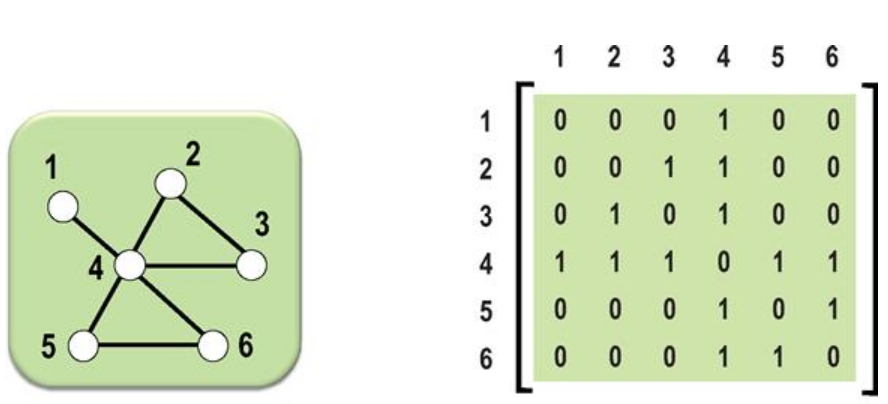

In [9]:
from IPython.display import Image
Image(filename='imagens/Matriz_Adj_1.png', width=500, height=500)

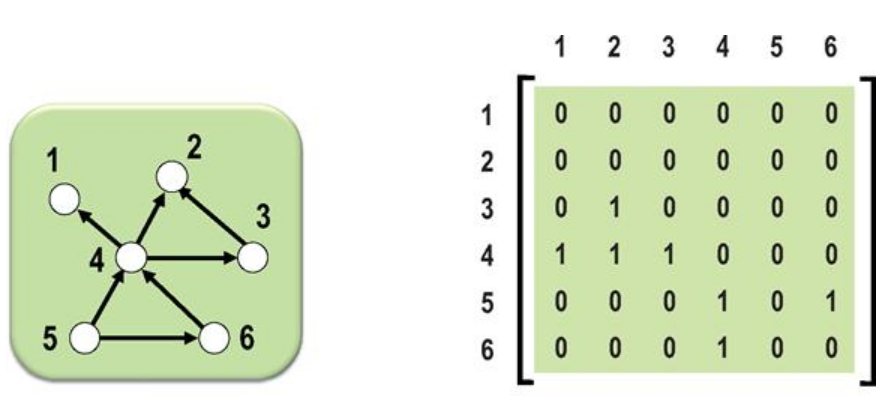

In [10]:
Image(filename='imagens/Matriz_Adj_2.png', width=500, height=500)

In [11]:
# Classe matriz de adjacência herda da classe Grafo
class MatrizAdj(Grafo):
    # Alocando a quantidade de vértices
    def alocaVertices(self, n):
        # Inicializando os membros herdados da classe pai
        super().alocaVertices(n)
        
        '''
        Alocando memória para a matriz de adjacência 
        (desconsiderando) o indice zero
        '''
        self.M = [None]*(self.n + 1)
        for i in range(1, self.n + 1):
            self.M[i] = [0]*(self.n + 1)
            
    # Função que remove uma aresta (u,v) do grafo
    def removeAresta(self, u, v):
        # Testando a validade do par
        if (u > 0 and v > 0 and u <= self.n and v <= self.n): 
            self.M[u][v] = 0
            
        if (not self.orientado):
            self.M[v][u] = 0
            
        self.m = self.m - 1
        
    # Função que adiciona uma aresta (u,v) do grafo
    def adicionaAresta(self, u, v):
        # Testando a validade do par
        if (u > 0 and v > 0 and u <= self.n and v <= self.n): 
            self.M[u][v] = 1
            
        if (not self.orientado):
            self.M[v][u] = 1
            
        self.m = self.m + 1
        
    # Retorna True se os vértices u e v são adjacentes
    def ehVizinho(self, u, v):
        return self.M[u][v] == 1
    
    '''
    Retorna a lista de vizinhos do vértice v. Notações:
    '*': lista todas as arestas incidentes a v.
    '+' ('-'): arestas de saída (entrada). 
    'iteraSobreNo': só utilizada na estrutura ListaAdj.
    ''' 
    def obtemVizinhos(self, v, tipo = "*", iterarSobreNoh = False):
        w = 1
        t = "+" if tipo == "*" and self.orientado else tipo
        while (w <= self.n):
            # Arestas de saída
            if (t == "+"): 
                orig, dest = v, w
                
            else:
                # Arestas de entrada
                orig, dest = w, v 
                
            if (self.ehVizinho(orig, dest)):
                yield w
            w = w + 1
            
            if (w > self.n and t == "+" and tipo == "*"):
                t, w = "-", 1

## Classe Lista de Adjacência

* *Nesse exemplo, acrescentamos uma lista de arestas como estrutura auxiliar. Tal estrutura pode ser utilizada de maneira independente, e será útil quando estudarmos o Algoritmo de Kruskall, para a construção de uma Árvore Geradora Mínina.*

Definimos a lista de adjacências de $G$ como um vetor de dimensão $n$, correpondendo a cada elemento de $V$. Cada posição $v \in V$, por sua vez, possui uma lista encadeada de nós, compostos por um identificador de vértice e um ponteiro para o próximo vértice da lista, constituindo todos os vizinhos do vértice $v$.

A Figura a seguir ilustra um exemplo de lista de adjacência, para um grafo não-direcionado.

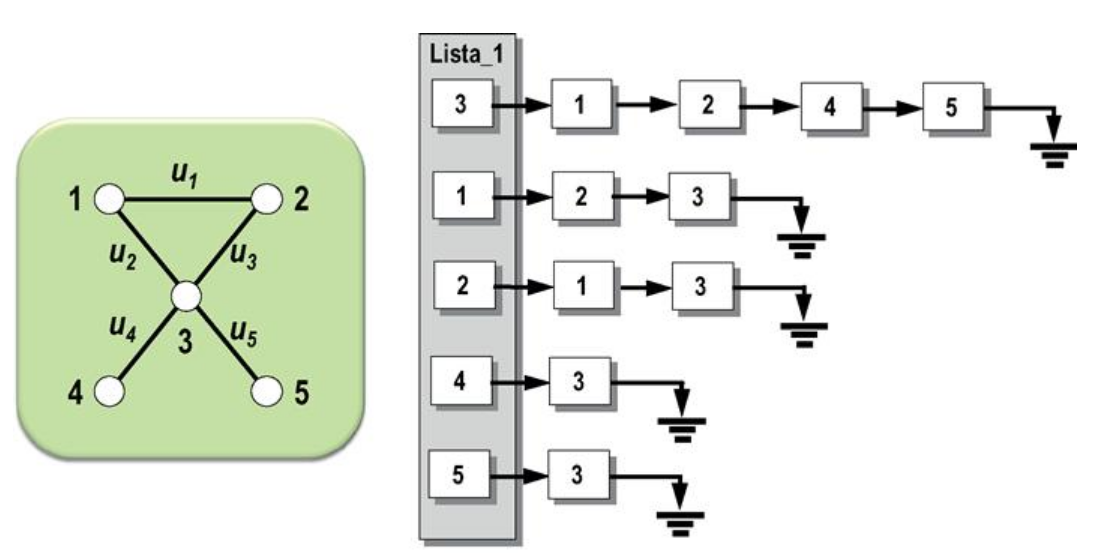

In [12]:
Image(filename='imagens/Lista_Adj.png', width=500, height=500)

In [77]:
# Classe lista de adjacência herda da classe Grafo
class ListaAdj(Grafo):
    '''
    Alguns membros da classe NohAresta
    - viz: vizinho de um nó, na lista
    - e: aresta 
    - prox: próxima aresta na lista de adjacência
    - tipo: (+/-)
    '''
    class NohAresta(object):
        # Construtor da classe
        def __init__(self):
            self.viz = None
            self.e = None # Sera um objeto do tipo Aresta
            self.prox = None
            # Noh de uma aresta de saida (+) ou entrada (-)
            self.tipo = '' 
          
    '''
    Membros da classe Aresta
    - v1, noh1: um dos vértices da aresta e seu respectivo nó, 
    isto é, v1 == noh1.viz
    - v2, noh2: análogo em relação ao segundo vértice
    '''    
    class Aresta(object):
        # Construtor default
        def __init__(self):
            self.v1, self.noh1 = None, None
            self.v2, self.noh2 = None, None
            
    '''
    Função que define o número de vértices do grafo. 
    Nossa lista terá uma lista simplesmente encadeada.
    '''
    def alocaVertices(self, n):
        # Inicializando os membros herdados da classe pai            
        super().alocaVertices(n) 
        
        # Nossa lista de adjacencia
        self.L = [None]*(self.n + 1)
        # Desconsideramos o indice zero (neste exemplo)
        for i in range(1, self.n + 1):
            # Nó cabeça da lista
            self.L[i] = ListaAdj.NohAresta()         
    '''
    Adiciona a aresta correspondente ao par de 
    vértices (u,v) e a retorna
    '''
    def adicionaAresta(self, u, v):
        # Função auxiliar que adiciona à lista
        def adicionaLista(u, v, e, tipo):
            noh = ListaAdj.NohAresta()
            # Operações padrões com listas encadeadas
            noh.viz, noh.e = v, e
            noh.prox, self.L[u].prox = self.L[u].prox, noh
                    
            if (self.orientado):
                noh.tipo = tipo
                
            return noh
        
        e = ListaAdj.Aresta()
        e.v1, e.v2 = u, v
        e.noh1 = adicionaLista(u, v, e, "+")
        if(not self.orientado):
            e.noh2 = adicionaLista(v, u, e, "-")
        self.m = self.m + 1
        return e
    
    '''
    Remove a aresta correspondente ao par (u,v). Note que 
    aqui, representamos a aresta pela variável uv
    '''
    def removeAresta(self, uv):
        print("Exercicio!")
        self.m = self.m - 1
        
    # Verifica se dois nós são adjacentes
    def ehVizinho(self, u, v):
        tipo = "+" if self.orientado else "*"
        for w in self.obtemVizinhos(u, tipo):
            if (w == v):
                return True
        return False
        
    '''
    Retorna a lista de vizinhos do vértice v. O símbolo '*' 
    indica que vamos listar todas as arestas incidentes a 
    v. Logo, os vizinhos de v serão todos dos vértices que 
    compartilham uma aresta com v. Já os tipos '+' ('-'), 
    relativos ao fato do grafo ser orientado, indicam 
    vértices relacionados a arestas de saída (entrada). O 
    parâmetro iteraSobreNo só tem aplicabilidade na estrutura 
    ListaAdj.
    '''
    def obtemVizinhos(self, v, tipo = "*", iterarSobreNoh = False):
        w = self.L[v].prox
        while w != None:
            if (tipo == "*" or w.tipo == tipo):
                yield w if iterarSobreNoh else w.viz
            w = w.prox

## Classe Matriz de Incidência

A matriz de incidências de $G$ consiste em uma matriz $M$, de dimensão $m\times n$, em que cada linha corresponde a uma aresta de $E$ e cada coluna corresponde a um vértice de $V$. Os elementos de $M$ são definidos da seguinte forma:

$$
\begin{cases}
  m_{eu} = 1\mbox{ e }m_{ev} = 1, & e=(u,v) \in E \\
  m_{eu} = 0\mbox{ e }m_{ev} = 0, & \mbox{caso contrário.}
\end{cases}
$$

Para grafos direcionados, inserimos a notação de que se $e=(u,v) \in E$,
então $m_{eu} = 1$ e $m_{ev} = -1$ (com o grafo valorado, podemos substituir os valores 1 e -1 pelo respectivo peso da aresta, variando também o sinal). As Figuras 4 e 5 ilustram exemplos de matrizes de adjacência, para um grafo não-direcionado e um grafo direcionado, respectivamente.

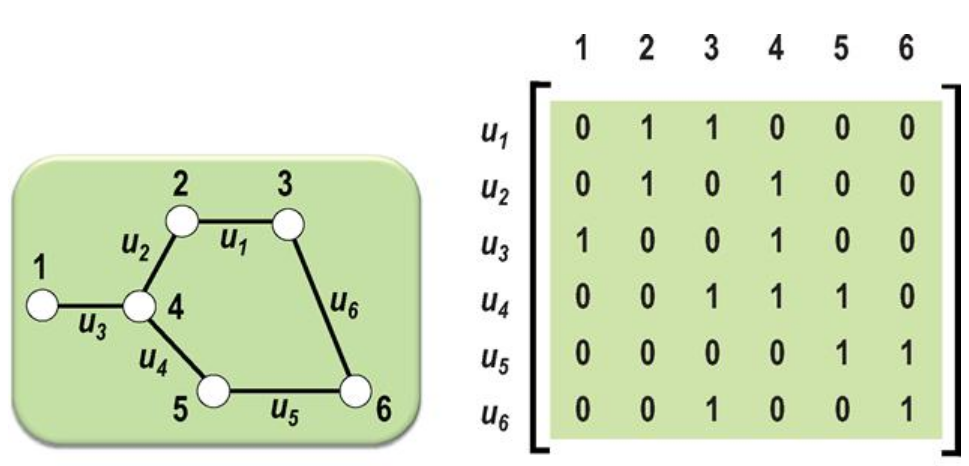

In [13]:
Image(filename='imagens/Matriz_Incidencia_1.png', width=500, height=500)

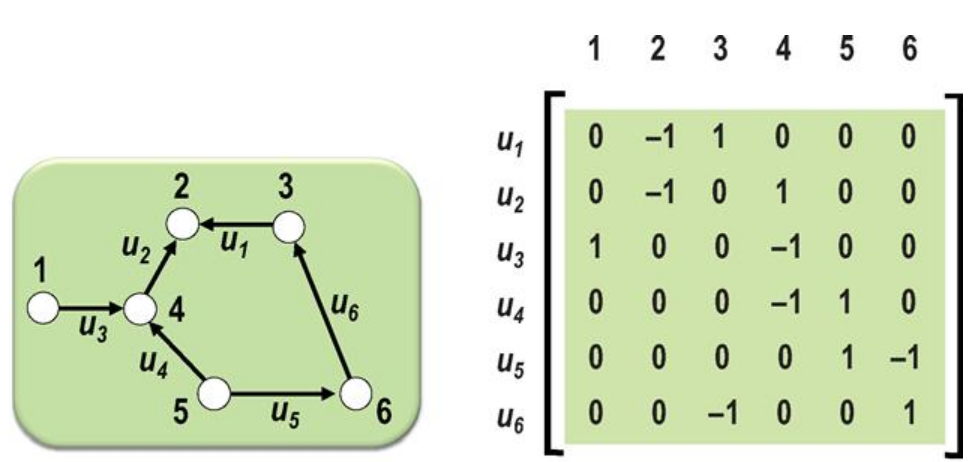

In [15]:
Image(filename='imagens/Matriz_Incidencia_2.png', width=500, height=500)

In [16]:
# Classe matriz de incidência herda da classe Grafo
class MatrizInc(Grafo):
   # Alocando a quantidade de vértices em uma matriz de incidência
    def alocaVertices(self, n):
        # Inicializando os membros herdados da classe pai        
        super(MatrizInc, self).alocaVertices(n) 
        
        # Alocando memória para a matriz de inidência
        print("Exercício!")
            
    # Função que remove uma aresta (u,v) do grafo
    def removeAresta(self, u, v):
        # Testando a validade do par
        if (u >= 0 and v >= 0 and u <= self.n and v <= self.n): 
            print("Exercício")
            
        if (not self.orientado):
            print("Exercício")
            
        self.m = self.m - 1
        
    # Função que adiciona uma aresta (u,v) do grafo
    def adicionaAresta(self, u, v):
        # Testando a validade do par
        if (u >= 0 and v >= 0 and u <= self.n and v <= self.n): 
            print("Exercício")
            
        if (not self.orientado):
            print("Exercício")
            
        self.m = self.m + 1
        
    # Retorna True se os vértices u e v são vizinhos (adjacentes)
    def ehAVizinho(self, u, v):
        print("Exercício")
        # return ...
    
    '''
    Retorna a lista de vizinhos do vértice v. O símbolo '*' indica 
    que vamos listar todas as arestas incidentes a v. Logo, os 
    vizinhos de v serão todos dos vértices que compartilham uma 
    aresta com v. Já os tipos '+' ('-'), relativos ao fato do 
    grafo ser orientado, indicam vértices relacionados a arestas 
    de saída (entrada). O parâmetro iteraSobreNo só tem 
    aplicabilidade na estrutura ListaAdj.
    ''' 
    def obtemVizinhos(self, v, tipo = "*", iteraSobreNo = False):
        print("Exercício")

## Lista de Arestas

A **Lista de Arestas** é uma estrutura de dados mais simples, que corresponde a uma lista de tuplas (ou triplas, caso o grafo seja ponderado) representando o conjunto $E$. Não temos a informação direta das adjacências dos vértices, nem do número de vértices (inclusive). 

Tal estrutura gasta $O(|E|)$ de espaço de armazenamento, e é útil no Algoritmo de Kruskall, que retorna a árvore geradora de menor custo em um grafo não-orientado ponderado. No entanto, a Lista de Arestas pode deixar o trabalho de algoritmos que lidam com a incidência de arestas em determinados vértices mais complicado.

In [17]:
# Classe Lista de Arestas
class ListaArestas:
    
    def __init__(self):
        self.lista = []

    # Função que adiciona uma aresta (u,v) do grafo
    def adicionaAresta(self, u, v):
        self.lista.append((u,v))
    
    # Retorna True se os vértices u e v são vizinhos (adjacentes)
    def ehVizinho(self, u, v):
        '''
        Gasta complexidade de O(len(self.lista))
        Veja: https://wiki.python.org/moin/TimeComplexity
        '''
        return (u,v) in self.lista
        
    def obtemVizinhos(self, v):
         # lista de vizinhos de v
        vizinhos = []
        for (i,j) in self.lista:
            if(i == v):
                vizinhos.append(j)
            elif(j == v):
                vizinhos.append(i)
        return vizinhos
                
    def __str__(self):
        saida = "Lista de arestas: [ "
        for e in self.lista:
            saida += str(e) + " "
        saida += "]"
        return saida

## Testando ListaArestas

In [18]:
LAr = ListaArestas() # Lista de arestas

# Lendo o arquivo com as infos do Grafo
linhas = [linha.rstrip().split() for linha in open('2-Grafo.txt')]
for linha in linhas:
    # Eliminando a primeira linha
    if(len(linha) > 1):
        u = int(linha[0])
        v = int(linha[1])
        LAr.adicionaAresta(u, v)
print(LAr)
print("ehVizinho(1,2)? ", LAr.ehVizinho(1,2))
print("ehVizinho(4,5)? ", LAr.ehVizinho(4,5))
print("obtemVizinhos(5): ", LAr.obtemVizinhos(5))
arquivo.close()

FileNotFoundError: [Errno 2] No such file or directory: '2-Grafo.txt'

## Testando MatrizAdj e ListaAdj

In [19]:
# Arestas a serem adicionadas em G
E = [(1,2), (1,3), (1,4), (2,4), (3,4)]

# Numero de vertices
n = 4

# Alocando uma variável do tipo MatrizAdj
M = MatrizAdj()
# Alocando uma variável do tipo ListaAdj
L = ListaAdj() 

M.alocaVertices(n)
L.alocaVertices(n)

for e in E:
    M.adicionaAresta(e[0], e[1])
    L.adicionaAresta(e[0], e[1])

arestas1 = list(M.obtemArestas())
print(arestas1)

arestas2 = list(L.obtemArestas())
print(arestas2)

NameError: name 'ListaAdj' is not defined

### Desenhando o grafo a partir da ferramenta *networkx*

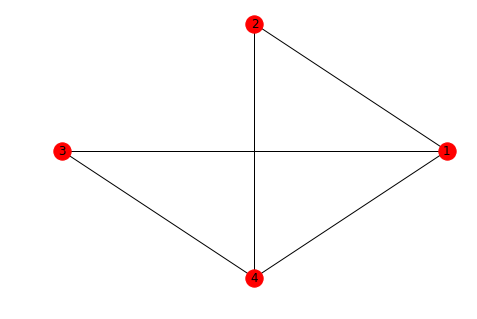

In [85]:
# Utilizando o networkx
G=nx.Graph() 

# Inserindo as arestas em G
for e in E:
    G.add_edge(e[0], e[1])  

# Modificando o layout
pos=nx.circular_layout(G)

# Desenhando o grafo
nx.draw(G,pos,with_labels=True)
plt.savefig("graph.png")
plt.show()

## Referências

* Goldbarg, Marco, and Elizabeth Goldbarg. 2012. Grafos: Conceitos, Algoritmos E Aplicações. Elsevier.

* Szwarcfiter, Jayme Luiz. 2018. Teoria Computacional de Grafos: Os Algoritmos. Elsevier Brasil.